In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
andrewmvd_lung_and_colon_cancer_histopathological_images_path = kagglehub.dataset_download('andrewmvd/lung-and-colon-cancer-histopathological-images')

print('Data source import complete.')


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca637.jpeg
/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca3400.jpeg
/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca783.jpeg
/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca3927.jpeg
/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca4109.jpeg
/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca95.jpeg
/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca488.jpeg
/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca2140.jp

In [2]:
base_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets"
categories = ["colon_aca","colon_n"]

In [3]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [4]:
df.head()

image_path      label
0  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
1  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
2  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
3  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
4  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca

In [5]:
df.tail()

image_path    label
9995  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9996  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9997  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9998  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9999  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n

In [6]:
df.shape

(10000, 2)

In [7]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  10000 non-null  object
 1   label       10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [11]:
df['label'].unique()

array(['colon_aca', 'colon_n'], dtype=object)

In [12]:
df['label'].value_counts()

label
colon_aca    5000
colon_n      5000
Name: count, dtype: int64

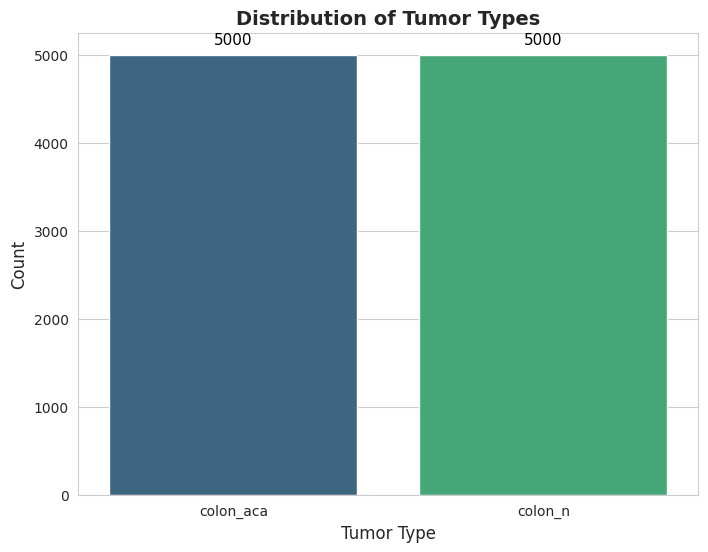

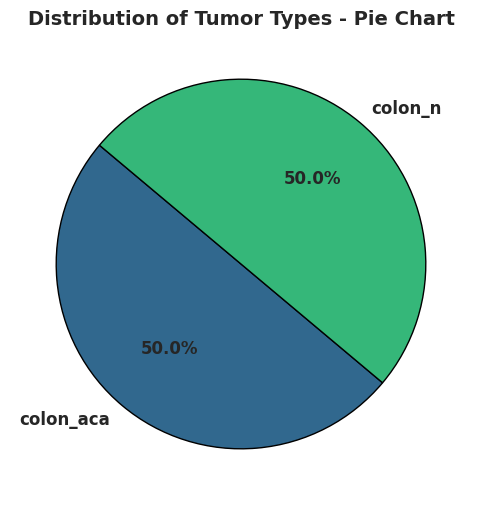

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

label_counts = df["label"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

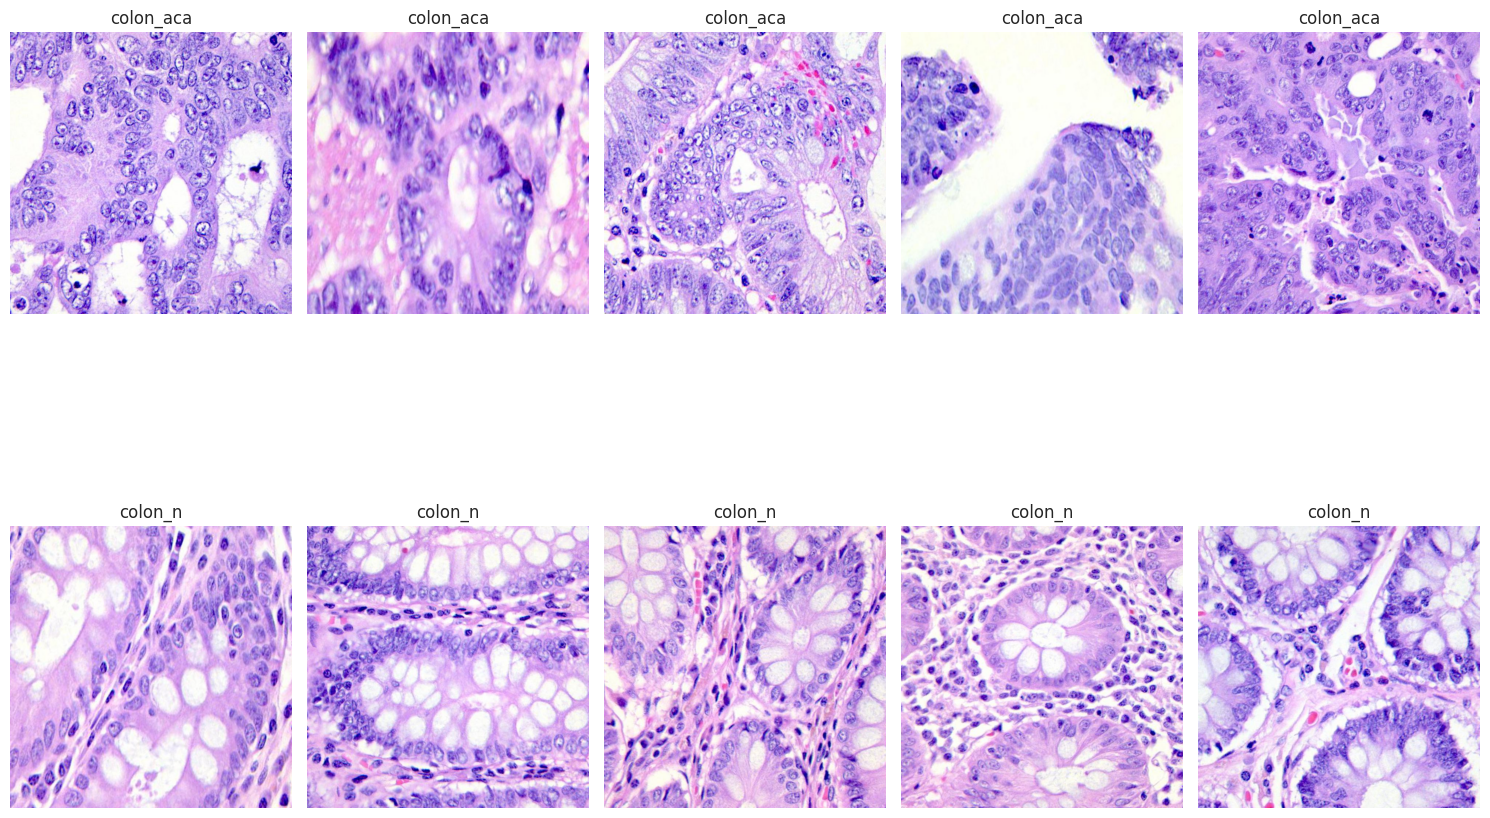

In [14]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [16]:
df = df[['image_path', 'category_encoded']]

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [19]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [20]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    5000
1    5000
Name: count, dtype: int64


In [21]:
df_resampled

image_path  category_encoded
0     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
1     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
2     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
3     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
4     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
...                                                 ...               ...
9995  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9996  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9997  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9998  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9999  /kaggle/input/lung-and-colon-cancer-histopatho...                 1

[10000 rows x 2 columns]

In [22]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [24]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [25]:
batch_size = 16
img_size = (256, 256)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='binary',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 8000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [26]:
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Multiply, Reshape, BatchNormalization, Activation
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [27]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [28]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)

GPU is set for TensorFlow


In [29]:
from tensorflow.keras.layers import Add

In [30]:
from tensorflow.keras.layers import Add, GlobalAveragePooling2D, Dense, BatchNormalization, Reshape, Multiply, Input, UpSampling2D

In [31]:
from tensorflow.keras.layers import Add, GlobalAveragePooling2D, Dense, BatchNormalization, Reshape, Multiply, Input, Conv2D, UpSampling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K  

def attention_block(inputs, filters):
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(filters // 16, activation='relu')(x)
    x = Dense(filters, activation='sigmoid')(x)
    x = Reshape((1, 1, filters))(x)
    return Multiply()([inputs, x])

def build_mranet(input_shape=(256, 256, 3), num_classes=2):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

    conv4_block6_out = base_model.get_layer('conv4_block6_out').output
    conv5_block3_out = base_model.get_layer('conv5_block3_out').output

    attn_block1 = attention_block(conv4_block6_out, filters=1024)
    attn_block2 = attention_block(conv5_block3_out, filters=2048)

    attn_block2 = Conv2D(1024, (1, 1), padding='same', activation='relu')(attn_block2)

    attn_block2 = UpSampling2D((2, 2))(attn_block2)

    attn_block1_shape = K.int_shape(attn_block1)
    attn_block2_shape = K.int_shape(attn_block2)
    print("Shape of attn_block1:", attn_block1_shape)
    print("Shape of attn_block2:", attn_block2_shape)

    merged_attention = Add()([attn_block1, attn_block2])

    x = GlobalAveragePooling2D()(merged_attention)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x) 
    x = BatchNormalization()(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)

    for layer in base_model.layers:
        layer.trainable = False

    return model

mranet_model = build_mranet()
mranet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  
    metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of attn_block1: (None, 16, 16, 1024)
Shape of attn_block2: (None, 16, 16, 1024)


In [32]:
from PIL import Image

def my_image_check(generator):  
    while True:
        x, y = next(generator) 
        new_x = []
        new_y = []
        for i in range(x.shape[0]):  
            try:
                img = Image.fromarray((x[i] * 255).astype(np.uint8))
                img.verify()
                new_x.append(x[i])
                new_y.append(y[i])
            except Exception as e:
                print(f"Error loading image: {generator.dataframe['image_path'].iloc[generator.index + i] if (generator.index + i) < len(generator.dataframe) else 'Path information not available'}") 
                print(f"Error: {e}")
        yield np.array(new_x), np.array(new_y)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_generator = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    stratify=df_resampled['category_encoded'] 
)
train_gen_new = my_image_check(train_generator)  

valid_generator = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    stratify=df_resampled['category_encoded'] 
)

valid_gen_new = my_image_check(valid_generator)  

test_generator = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size,
    stratify=df_resampled['category_encoded'] 
)

test_gen_new = my_image_check(test_generator)  


steps_per_epoch = len(train_df_new) // batch_size
validation_steps = len(valid_df_new) // batch_size

Found 8000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [33]:
history = mranet_model.fit(
    train_gen_new,
    epochs=10,
    validation_data=valid_gen_new,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 135s 235ms/step - accuracy: 0.6572 - loss: 0.6271 - val_accuracy: 0.7540 - val_loss: 0.6076
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 51s 102ms/step - accuracy: 0.7259 - loss: 0.5935 - val_accuracy: 0.7663 - val_loss: 0.5674
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.7429 - loss: 0.5779 - val_accuracy: 0.7530 - val_loss: 0.5349
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.7662 - loss: 0.5324 - val_accuracy: 0.7846 - val_loss: 0.4892
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 94ms/step - accuracy: 0.7728 - loss: 0.5180 - val_accuracy: 0.8059 - val_loss: 0.4639
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.7733 - loss: 0.5086 - val_accuracy: 0.7866 - val_loss: 0.4890
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 47s 93ms/step - accuracy: 0.7982 - loss: 0.4771 - val_accuracy: 0.8049 - val_loss: 0.5074
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.8009 - loss: 0.4804

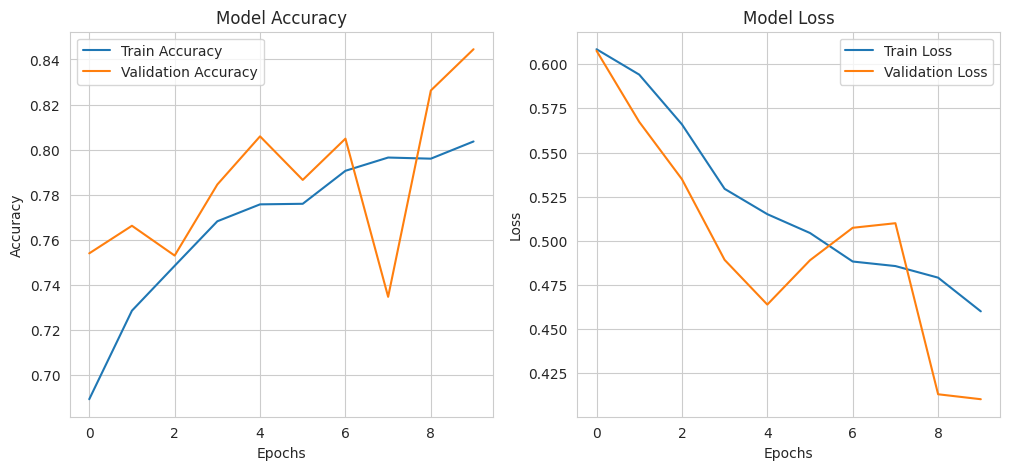

In [34]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 237ms/step


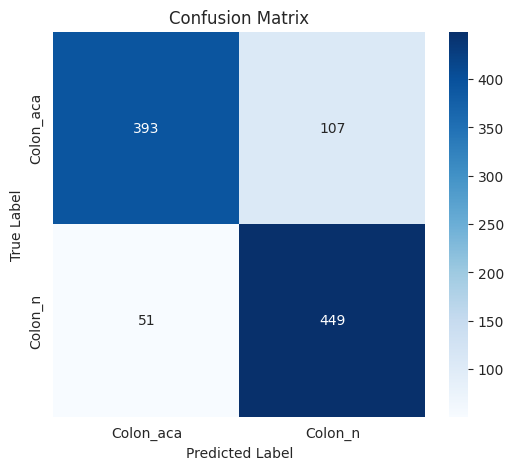

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.83       500
           1       0.81      0.90      0.85       500

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = test_generator.classes  
y_pred = mranet_model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_aca', 'Colon_n'], yticklabels=['Colon_aca', 'Colon_n'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Add, GlobalAveragePooling2D, Dense, BatchNormalization, Reshape, Multiply, Input, Conv2D, UpSampling2D, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

def se_block(input_tensor, ratio=8):
    channels = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(channels // ratio, activation='relu')(se)
    se = Dense(channels, activation='sigmoid')(se)
    se = Reshape((1, 1, channels))(se)
    return Multiply()([input_tensor, se])

def build_mranet(input_shape=(256, 256, 3), num_classes=1):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

    conv4_block6_out = base_model.get_layer('conv4_block6_out').output
    conv5_block3_out = base_model.get_layer('conv5_block3_out').output

    attn_block1 = se_block(conv4_block6_out, ratio=8)
    attn_block2 = se_block(conv5_block3_out, ratio=8)

    attn_block2 = Conv2D(1024, (3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(attn_block2)
    attn_block2 = UpSampling2D((2, 2))(attn_block2)

    attn_block1 = Conv2D(1024, (1, 1), padding='same', activation='relu')(attn_block1)  # Match channels

    merged_attention = Add()([attn_block1, attn_block2])

    x = GlobalAveragePooling2D()(merged_attention)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)

    for layer in base_model.layers[-10:]:
        layer.trainable = True

    return model

mranet_model = build_mranet()

mranet_model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [37]:
history = mranet_model.fit(
    train_gen_new,
    epochs=5,
    validation_data=valid_gen_new,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 207s 280ms/step - accuracy: 0.9739 - loss: 5.0635 - val_accuracy: 0.5081 - val_loss: 2.8733
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 258ms/step - accuracy: 0.9977 - loss: 1.0634 - val_accuracy: 0.8537 - val_loss: 0.6418
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 259ms/step - accuracy: 0.9994 - loss: 0.2528 - val_accuracy: 0.9980 - val_loss: 0.0973
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 258ms/step - accuracy: 0.9969 - loss: 0.0827 - val_accuracy: 0.9980 - val_loss: 0.0489
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 257ms/step - accuracy: 0.9976 - loss: 0.0352 - val_accuracy: 1.0000 - val_loss: 0.0122


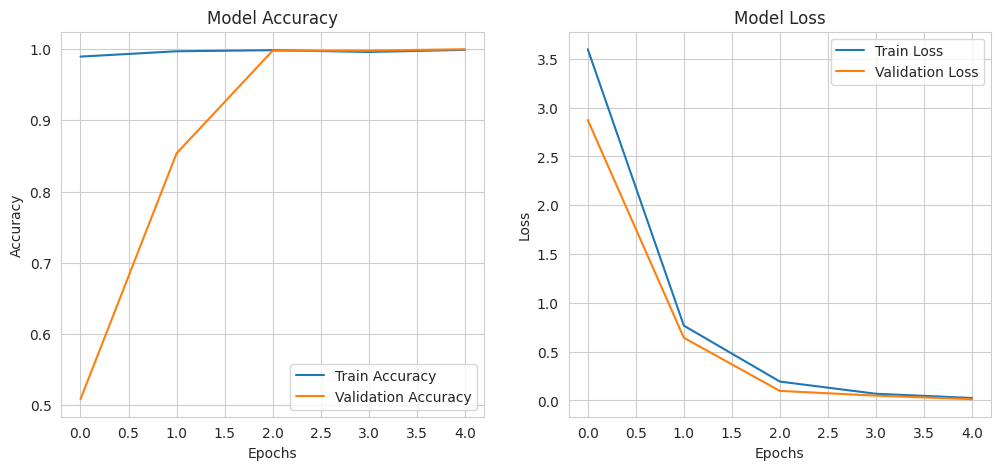

In [38]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step


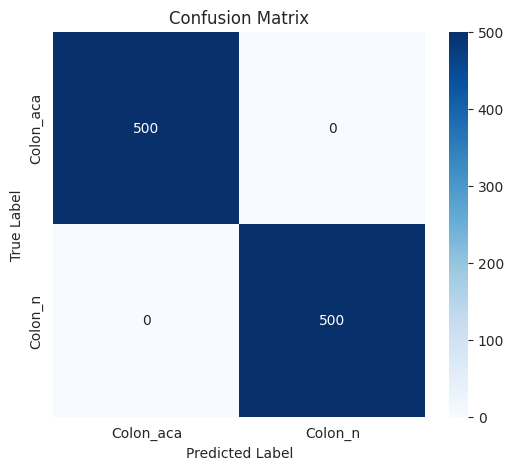

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [39]:
y_true = test_generator.classes  
y_pred = mranet_model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_aca', 'Colon_n'], yticklabels=['Colon_aca', 'Colon_n'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))